In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\adity\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
df = pd.read_csv('insurance_part2_data.csv')

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

### Performing basic EDA

#### Checking head and tail of data

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Data Summary

In [7]:
df_des = df.describe().T
df_des['IQR'] = df_des['75%'] - df_des['25%']
df_des['COV'] = df_des['std']/df_des['mean']

In [8]:
df_des

,count,mean,std,min,25%,50%,75%,max,IQR,COV
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00,10.000,0.274698
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21,17.235,1.753809
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00,52.000,1.915011
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00,49.000,1.174009


In [9]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

#### Null value Check

In [10]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

- Dataset has no null values, with each column containing 3000 values
- Commission, Duration and Sales are right skewed, which can also be seen in the high COV values
- Mean in the above listed columns is way higher than the 50% values.
- Age is almost normally distributed.

#### Checking shape

In [11]:
print('Shape of data is: ',df.shape)

Shape of data is:  (3000, 10)


In [12]:
dups = df.duplicated()
df[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [13]:
print('The data constains', dups.sum(),'duplicates')

The data constains 139 duplicates


In [14]:
print('There are',df.duplicated().sum(),' duplicates')

There are 139  duplicates


#### Removing the duplicates

In [15]:
print('Shape of data with duplicates:', df.shape)
df.drop_duplicates(inplace = True)
print('Shape of data after removing duplicates:', df.shape)

Shape of data with duplicates: (3000, 10)
Shape of data after removing duplicates: (2861, 10)


#### Univariate analysis

In [16]:
def univariate(col):
    print('Description of',col,' is: -')
    print(df[col].describe())
    print(' ')
    print('-----------------------------------------------------------')
    print("Mean is: ", df[col].mean())
    print("Median is: ", df[col].median())
    print("Mode is: ", df[col].mode()[0])
    print('-----------------------------------------------------------')
    print(" ")
    
    print("Distribution of ", col, ' is: -')
    
    sns.displot(x = df[col], kde = True, height = 4)
    plt.axvline(x = df[col].mean(), color = 'green',label = 'mean')
    plt.axvline(x = df[col].median(), color = 'red', label = 'median')
    plt.axvline(x = df[col].mode()[0], color = 'yellow', label = 'mode')
    plt.legend()
    plt.show()
    
    print('-----------------------------------------------------------')
    print(' ')
    print('Boxplot of',col,' is: -')
    plt.figure(figsize = (3,2))
    sns.boxplot(x = df[col],width = .6)
    plt.show()
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(' ')

Description of Age  is: -
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64
 
-----------------------------------------------------------
Mean is:  38.204124432016776
Median is:  36.0
Mode is:  36
-----------------------------------------------------------
 
Distribution of  Age  is: -


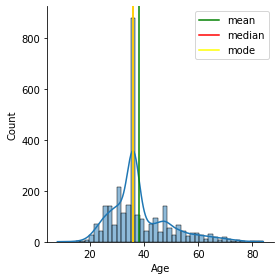

-----------------------------------------------------------
 
Boxplot of Age  is: -


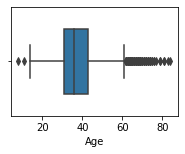

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of Commision  is: -
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64
 
-----------------------------------------------------------
Mean is:  15.080996155190423
Median is:  5.63
Mode is:  0.0
-----------------------------------------------------------
 
Distribution of  Commision  is: -


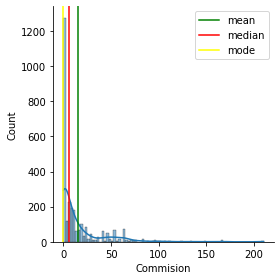

-----------------------------------------------------------
 
Boxplot of Commision  is: -


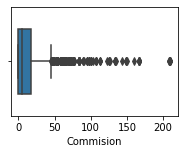

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of Duration  is: -
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64
 
-----------------------------------------------------------
Mean is:  72.12023767913317
Median is:  28.0
Mode is:  10
-----------------------------------------------------------
 
Distribution of  Duration  is: -


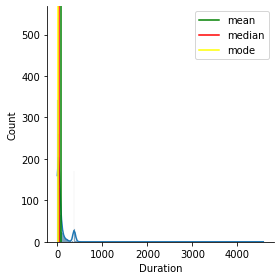

-----------------------------------------------------------
 
Boxplot of Duration  is: -


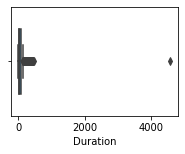

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of Sales  is: -
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64
 
-----------------------------------------------------------
Mean is:  61.757878364208416
Median is:  33.5
Mode is:  20.0
-----------------------------------------------------------
 
Distribution of  Sales  is: -


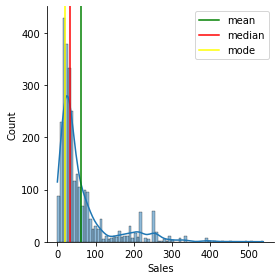

-----------------------------------------------------------
 
Boxplot of Sales  is: -


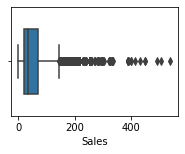

-----------------------------------------------------------
-----------------------------------------------------------
 


In [17]:
for i in df.select_dtypes(include = ['int64','float64']):
    univariate(i)

<AxesSubplot:>

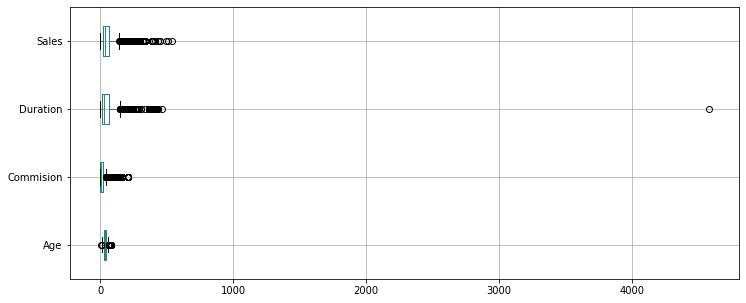

In [18]:
df.boxplot(figsize = (12,5), vert = 0)

#### Bivariate analysis

<Figure size 360x360 with 0 Axes>

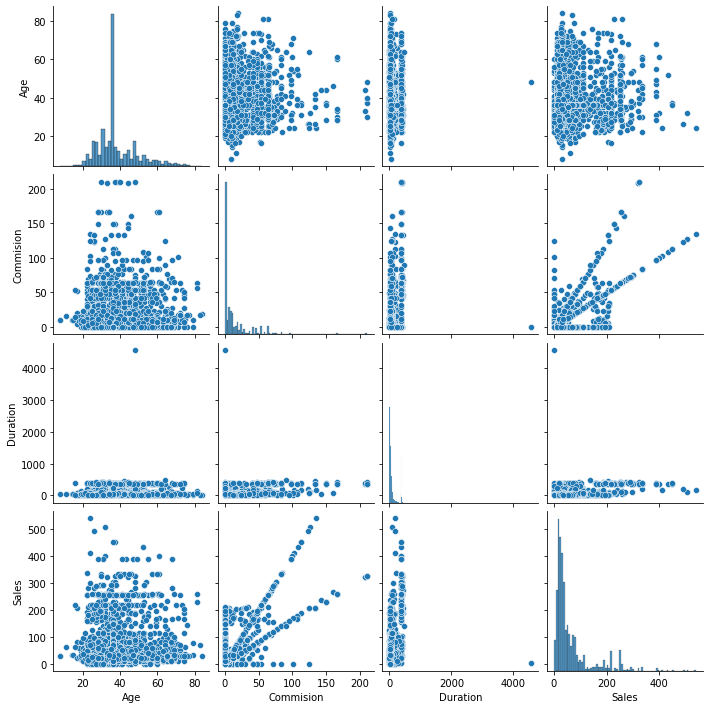

In [19]:
plt.figure(figsize = (5,5))
sns.pairplot(data = df);

<AxesSubplot:>

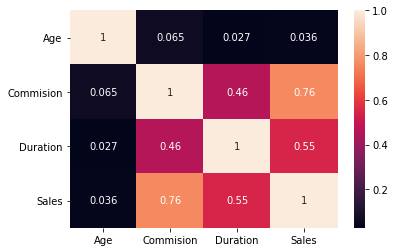

In [20]:
sns.heatmap(df.corr(), annot = True)

- From the heatmap it is evident that sales and commission are the only ones associated strongly, as compared to others
- Still looking at the scatterplot, we can't defer a certain fixed trend

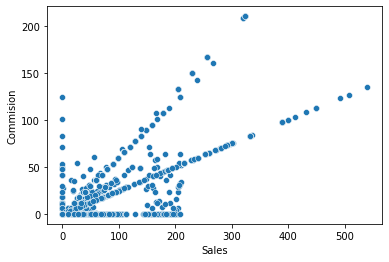

In [21]:
sns.scatterplot(x = df.Sales, y = df.Commision);

In [22]:
df.Type.value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

In [23]:
df.Channel.value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

In [24]:
df['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

In [25]:
df['Destination'].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

In [26]:
df['Agency_Code'].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

#### Countplot

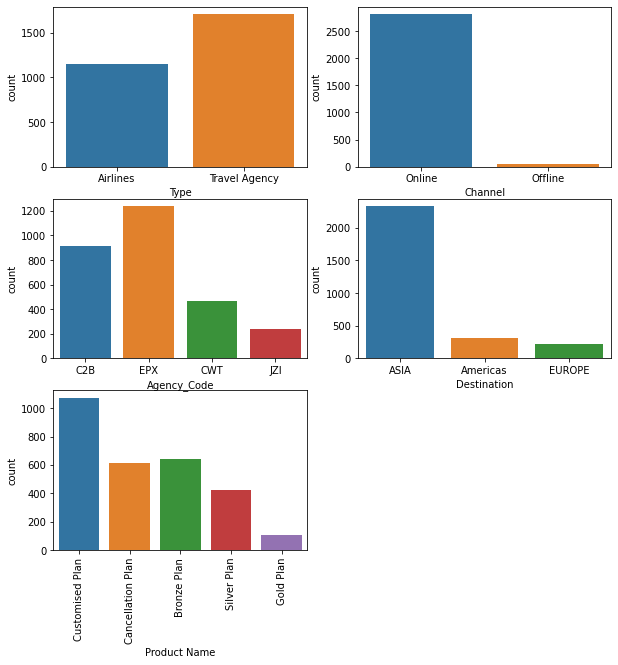

In [27]:
plt.figure(figsize = (10,10));
plt.subplot(3,2,1)
sns.countplot(x = df.Type)

plt.subplot(3,2,2)
sns.countplot(x = df.Channel)

plt.subplot(3,2,5)
sns.countplot(x = df['Product Name'])

plt.xticks(rotation = 90)
plt.subplot(3,2,4)
sns.countplot(x = df.Destination);

plt.subplot(3,2,3)
sns.countplot(x = df['Agency_Code']);


#### Factors affecting sales

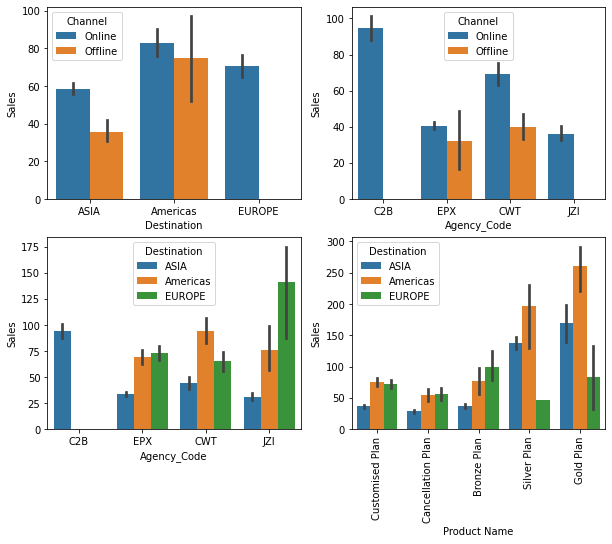

In [41]:
plt.figure(figsize = (10,12))

plt.subplot(3,2,1)
sns.barplot(x= df.Destination, y = df.Sales, hue = df.Channel);

plt.subplot(3,2,4)
sns.barplot(x = df['Product Name'], y = df.Sales, hue = df.Destination);
plt.xticks(rotation = 90)

plt.subplot(3,2,3)
sns.barplot(x = df.Agency_Code, y = df.Sales, hue = df.Destination);

plt.subplot(3,2,2)
sns.barplot(x = df.Agency_Code, y = df.Sales, hue = df.Channel)

plt.show()

# 2.2 Data Split: Split the data into test and train (1.5 pts), build classification model CART (2 pts), Random Forest (2 pts), Artificial Neural Network(2 pts).

In [40]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


- The object dtypes need to be converted to int values.
- For modelling ANN's we require scaling.

In [41]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

#### Converting object to int

In [42]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i] = pd.Categorical(df[i]).codes

In [43]:
df.dtypes

Age               int64
Agency_Code        int8
Type               int8
Claimed            int8
Commision       float64
Channel            int8
Duration          int64
Sales           float64
Product Name       int8
Destination        int8
dtype: object

In [44]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


#### Splitting the data
- Target value: Claimed

In [45]:
X = df.drop('Claimed', axis=1)
Y = df['Claimed']

In [47]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [50]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, Length: 2861, dtype: int8

In [51]:
df.Claimed.value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [52]:
df.Claimed.value_counts(normalize = True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

Certainly the data is not balcanced.
- 0: 69.2%
- 1: 30.8%

In [53]:
from sklearn.model_selection import train_test_split

### CART Model

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
X_train, X_test, train_labels, test_labels = train_test_split(X,Y, test_size = .3, random_state = 1)

In [56]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1300,69,0,0,6.00,1,7,15.0,0,0
2332,36,2,1,0.00,1,29,35.0,2,0
900,60,1,1,41.58,1,8,69.3,2,1
207,36,0,0,9.75,1,70,39.0,4,0
2310,36,2,1,0.00,1,39,51.0,1,2


In [57]:
train_labels

1300    1
2332    1
900     0
207     1
2310    0
       ..
2894    0
929     0
1132    0
236     0
1097    0
Name: Claimed, Length: 2002, dtype: int8

In [58]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
642,31,1,1,0.00,0,402,97.0,2,0
219,68,2,1,0.00,1,60,29.0,1,0
1685,42,0,0,21.00,1,11,84.0,4,0
962,44,1,1,23.76,1,51,39.6,2,0
800,50,1,1,35.64,1,111,59.4,2,0


In [59]:
test_labels

642     0
219     0
1685    0
962     0
800     1
       ..
2948    0
2203    0
445     0
2964    0
2055    1
Name: Claimed, Length: 859, dtype: int8

In [60]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [61]:
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [30, 45, 60, 90],
    'min_samples_split': [90, 135, 180, 270]
}

In [62]:
grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [63]:
grid_search_dt.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [30, 45, 60, 90],
                         'min_samples_split': [90, 135, 180, 270]})

In [64]:
grid_search_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 270}

In [65]:
best_grid_dt = grid_search_dt.best_estimator_

#### Feature importance

In [66]:
pd.DataFrame(best_grid_dt.feature_importances_, columns = ['IMP'], index = X_train.columns).sort_values('IMP',ascending = False)

,IMP
Agency_Code,0.581006
Sales,0.297166
Product Name,0.045823
Commision,0.043860
Duration,0.018858
Age,0.013286
Type,0.000000
Channel,0.000000
Destination,0.000000


#### Predictions on train and test data

In [67]:
y_train_pred_dt = best_grid_dt.predict(X_train)
y_test_pred_dt = best_grid_dt.predict(X_test)

#### Predcition probability on train and test data

In [68]:
y_train_pred_prob_dt = best_grid_dt.predict_proba(X_train)
y_test_pred_prob_dt = best_grid_dt.predict_proba(X_test)

In [69]:
pd.DataFrame(y_train_pred_prob_dt, columns = [['0','1']])

,0,1
0,0.847222,0.152778
1,0.672414,0.327586
2,0.837500,0.162500
3,0.424603,0.575397
4,0.823529,0.176471
...,...,...
1997,0.884793,0.115207
1998,0.672414,0.327586
1999,0.948357,0.051643
2000,0.573171,0.426829


In [70]:
pd.DataFrame(y_test_pred_prob_dt, columns = [['0','1']])

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.274112,0.725888
3,0.837500,0.162500
4,0.837500,0.162500
...,...,...
854,0.884793,0.115207
855,0.884793,0.115207
856,0.424603,0.575397
857,0.884793,0.115207


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
param_grid = {
    'max_depth': [5,7,9],
    'max_features': [2,3,4],
    'min_samples_leaf': [30,45,60],
    'min_samples_split': [90,135,180],
    'n_estimators': [101,201]
}

In [73]:
rfcl = RandomForestClassifier(random_state = 1)

In [74]:
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [75]:
grid_search_rfcl.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 7, 9], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [30, 45, 60],
                         'min_samples_split': [90, 135, 180],
                         'n_estimators': [101, 201]})

In [76]:
grid_search_rfcl.best_params_

{'max_depth': 9,
 'max_features': 3,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 201}

In [77]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

#### Feature importances

In [78]:
pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ['IMP'], index = X_train.columns).sort_values('IMP',ascending = False)

,IMP
Agency_Code,0.293556
Product Name,0.226727
Sales,0.184545
Commision,0.121972
Duration,0.066967
Type,0.062397
Age,0.031534
Destination,0.012303
Channel,0.000000


#### Predictions on train and test data

In [79]:
y_train_pred_rfcl = grid_search_rfcl.predict(X_train)
y_test_pred_rfcl = grid_search_rfcl.predict(X_test)

#### Prediction probability on train and test data

In [80]:
y_train_pred_prob_rfcl = grid_search_rfcl.predict_proba(X_train)
y_test_pred_prob_rfcl = grid_search_rfcl.predict_proba(X_test)

In [82]:
pd.DataFrame(y_train_pred_prob_rfcl, columns = [['0','1']]).head()

,0,1
0,0.698424,0.301576
1,0.765351,0.234649
2,0.744826,0.255174
3,0.433769,0.566231
4,0.867297,0.132703


In [83]:
pd.DataFrame(y_test_pred_prob_rfcl, columns = [['0','1']]).head()

,0,1
0,0.622367,0.377633
1,0.920324,0.079676
2,0.320209,0.679791
3,0.769770,0.230230
4,0.709676,0.290324


### ANN 

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [85]:
std = StandardScaler()

In [86]:
X_train_scl = std.fit_transform(X_train)
X_test_scl = std.transform(X_test)

In [94]:
pd.DataFrame(X_train_scl, columns = X_train.columns).head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,2.887642,-1.262611,-1.198133,-0.356790,0.119098,-0.448215,-0.653755,-1.313381,-0.447753
1,-0.216661,0.716831,0.834632,-0.588042,0.119098,-0.298327,-0.370328,0.243391,-0.447753
2,2.041014,-0.272890,0.834632,1.014535,0.119098,-0.441402,0.115749,0.243391,1.246769
3,-0.216661,-1.262611,-1.198133,-0.212257,0.119098,-0.018990,-0.313643,1.800164,-0.447753
4,-0.216661,0.716831,0.834632,-0.588042,0.119098,-0.230196,-0.143587,-0.534995,2.941292


In [95]:
pd.DataFrame(X_test_scl, columns = X_test.columns).head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,-0.687010,-0.272890,0.834632,-0.588042,-8.396428,2.242961,0.508295,0.243391,-0.447753
1,2.793573,0.716831,0.834632,-0.588042,0.119098,-0.087121,-0.455356,-0.534995,-0.447753
2,0.347758,-1.262611,-1.198133,0.221340,0.119098,-0.420963,0.324067,1.800164,-0.447753
3,0.535897,-0.272890,0.834632,0.327716,0.119098,-0.148439,-0.305140,0.243391,-0.447753
4,1.100316,-0.272890,0.834632,0.785596,0.119098,0.260348,-0.024548,0.243391,-0.447753


In [87]:
mlp = MLPClassifier(random_state = 1)

In [88]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100),(500,400,300)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

In [89]:
grid_search_mlp = GridSearchCV(estimator= mlp, param_grid = param_grid, cv = 10)

In [90]:
grid_search_mlp.fit(X_train_scl, train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (500, 400, 300)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [91]:
grid_search_mlp.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [92]:
best_grid_mlp = grid_search_mlp.best_estimator_

#### Prediction on train and test data

In [96]:
y_train_pred_mlp = grid_search_mlp.predict(X_train_scl)
y_test_pred_mlp = grid_search_mlp.predict(X_test_scl)

#### Prediction probability on train and test data

In [97]:
y_train_pred_prob_mlp = best_grid_mlp.predict_proba(X_train_scl)
y_test_pred_prob_mlp = best_grid_mlp.predict_proba(X_test_scl)

In [98]:
pd.DataFrame(y_train_pred_prob_mlp, columns = [['0','1']])

,0,1
0,0.581906,0.418094
1,0.830568,0.169432
2,0.801626,0.198374
3,0.439509,0.560491
4,0.877401,0.122599
...,...,...
1997,0.850949,0.149051
1998,0.819547,0.180453
1999,0.932072,0.067928
2000,0.753999,0.246001


In [99]:
pd.DataFrame(y_test_pred_prob_mlp, columns = [['0','1']])

,0,1
0,0.353300,0.646700
1,0.932529,0.067471
2,0.362354,0.637646
3,0.786004,0.213996
4,0.722460,0.277540
...,...,...
854,0.356041,0.643959
855,0.876128,0.123872
856,0.589007,0.410993
857,0.902690,0.097310


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1.5 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Write inferences on each model (2 pts).

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score,f1_score

## Evaluation for CART model

#### Accuracy 

In [101]:
print('Accuracy for CART Model on Training Data: ',grid_search_dt.score(X_train, train_labels))
print('Accuracy for CART Model on Testing Data: ', grid_search_dt.score(X_test, test_labels))
cart_train_acc = accuracy_score(train_labels,y_train_pred_dt)
cart_test_acc = accuracy_score(test_labels, y_test_pred_dt)

Accuracy for CART Model on Training Data:  0.7722277722277723
Accuracy for CART Model on Testing Data:  0.7811408614668219


#### Confusion Matrix

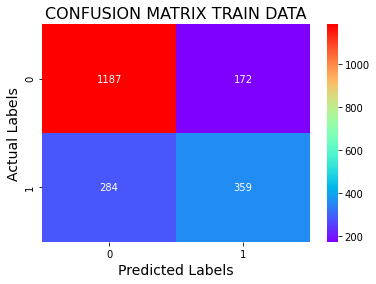

In [102]:
sns.heatmap(confusion_matrix(train_labels, y_train_pred_dt, ), annot = True, fmt = 'd', cmap = 'rainbow');
plt.title('CONFUSION MATRIX TRAIN DATA', fontsize = 16)
plt.xlabel('Predicted Labels', fontsize = 14);
plt.ylabel('Actual Labels', fontsize = 14);

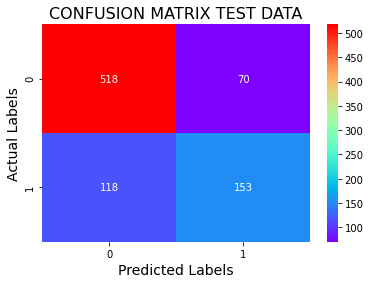

In [103]:
sns.heatmap(confusion_matrix(test_labels, y_test_pred_dt ), annot = True, fmt = 'd', cmap = 'rainbow');
plt.title('CONFUSION MATRIX TEST DATA', fontsize = 16)
plt.xlabel('Predicted Labels', fontsize = 14);
plt.ylabel('Actual Labels', fontsize = 14);

#### Classification Report

In [104]:
print("Classification report for train data: -")
print(' ')
print(classification_report(train_labels,y_train_pred_dt))

Classification report for train data: -
 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1359
           1       0.68      0.56      0.61       643

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [105]:
print("Classification report for test data: - ")
print(" ")
print(classification_report(test_labels, y_test_pred_dt))

Classification report for test data: - 
 
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       588
           1       0.69      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



#### ROC AUC curve and AUC score

AUC Score train Data:  0.8153986384188356


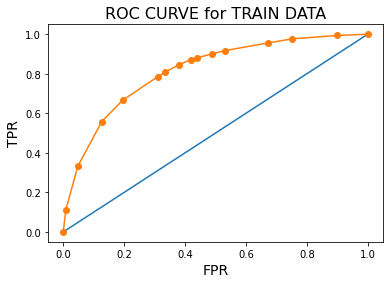

In [106]:
fpr,tpr,thresholds = roc_curve(train_labels, y_train_pred_prob_dt[:,1])
plt.plot([0,1],[0,1]);
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC CURVE for TRAIN DATA', fontsize = 16)
plt.xlabel('FPR', fontsize = 14)
plt.ylabel('TPR', fontsize = 14)
print('AUC Score train Data: ', roc_auc_score(train_labels, y_train_pred_prob_dt[:,1]))

AUC Score test Data:  0.7914093681753143


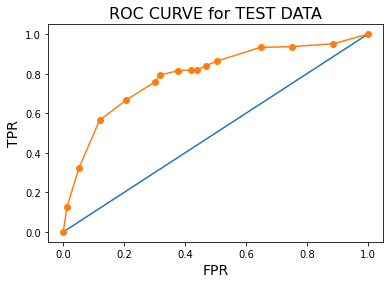

In [108]:
fpr,tpr,thresholds = roc_curve(test_labels, y_test_pred_prob_dt[:,1])
plt.plot([0,1],[0,1]);
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC CURVE for TEST DATA', fontsize = 16)
plt.xlabel('FPR', fontsize = 14)
plt.ylabel('TPR', fontsize = 14)
print('AUC Score test Data: ', roc_auc_score(test_labels, y_test_pred_prob_dt[:,1]))

### Inferences: 
- 
-
- 
-

## Evaluation of Random Forest

#### Accuracy

In [109]:
print('Accuracy for train data:', grid_search_rfcl.score(X_train, train_labels))
print('Accuracy for test data:', grid_search_rfcl.score(X_test, test_labels))

Accuracy for train data: 0.7777222777222778
Accuracy for test data: 0.7764842840512224


#### Confusion Matrix

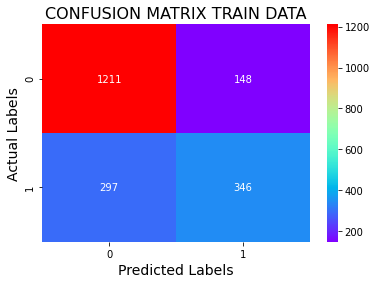

In [110]:
sns.heatmap(confusion_matrix(train_labels, y_train_pred_rfcl, ), annot = True, fmt = 'd', cmap = 'rainbow');
plt.title('CONFUSION MATRIX TRAIN DATA', fontsize = 16)
plt.xlabel('Predicted Labels', fontsize = 14);
plt.ylabel('Actual Labels', fontsize = 14);

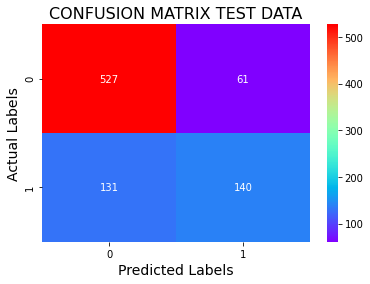

In [111]:
sns.heatmap(confusion_matrix(test_labels, y_test_pred_rfcl, ), annot = True, fmt = 'd', cmap = 'rainbow');
plt.title('CONFUSION MATRIX TEST DATA', fontsize = 16)
plt.xlabel('Predicted Labels', fontsize = 14);
plt.ylabel('Actual Labels', fontsize = 14);

In [112]:
print('Classification report for Train data: -')
print(" ")
print(classification_report(train_labels, y_train_pred_rfcl))

Classification report for Train data: -
 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.54      0.61       643

    accuracy                           0.78      2002
   macro avg       0.75      0.71      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [113]:
print('Classification report for Test data: -')
print(" ")
print(classification_report(test_labels, y_test_pred_rfcl))

Classification report for Test data: -
 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.70      0.52      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



#### ROC AUC curve and AUC score

AUC Score train Data:  0.8281676102064801


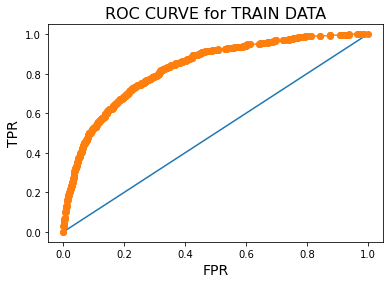

In [114]:
fpr,tpr,thresholds = roc_curve(train_labels, y_train_pred_prob_rfcl[:,1])
plt.plot([0,1],[0,1]);
plt.plot(fpr,tpr,marker = 'o');
plt.title('ROC CURVE for TRAIN DATA', fontsize = 16)
plt.xlabel('FPR', fontsize = 14)
plt.ylabel('TPR', fontsize = 14)
print('AUC Score train Data: ', roc_auc_score(train_labels, y_train_pred_prob_rfcl[:,1]))

AUC Score train Data:  0.8185292567211386


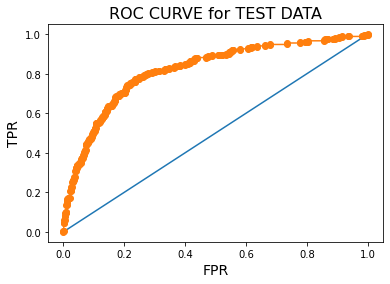

In [115]:
fpr,tpr,thresholds = roc_curve(test_labels, y_test_pred_prob_rfcl[:,1])
plt.plot([0,1],[0,1]);
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC CURVE for TEST DATA', fontsize = 16)
plt.xlabel('FPR', fontsize = 14)
plt.ylabel('TPR', fontsize = 14)
print('AUC Score train Data: ', roc_auc_score(test_labels, y_test_pred_prob_rfcl[:,1]))

## Evaluation for ANN

#### Accuracy

In [116]:
print('Accuracy for train data is: ', grid_search_mlp.score(X_train_scl, train_labels))
print('Accuracy for test data is: ', grid_search_mlp.score(X_test_scl, test_labels))

Accuracy for train data is:  0.7687312687312687
Accuracy for test data is:  0.770663562281723


#### Confusion matrix

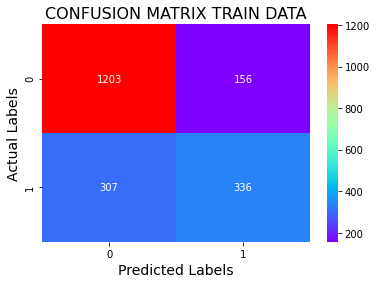

In [117]:
sns.heatmap(confusion_matrix(train_labels, y_train_pred_mlp, ), annot = True, fmt = 'd', cmap = 'rainbow');
plt.title('CONFUSION MATRIX TRAIN DATA', fontsize = 16)
plt.xlabel('Predicted Labels', fontsize = 14);
plt.ylabel('Actual Labels', fontsize = 14);

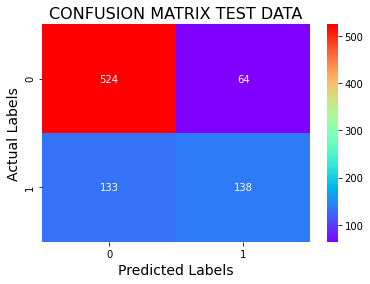

In [118]:
sns.heatmap(confusion_matrix(test_labels, y_test_pred_mlp, ), annot = True, fmt = 'd', cmap = 'rainbow');
plt.title('CONFUSION MATRIX TEST DATA', fontsize = 16)
plt.xlabel('Predicted Labels', fontsize = 14);
plt.ylabel('Actual Labels', fontsize = 14);

#### Classification Report

In [119]:
print('Classification report for train data: -')
print(classification_report(train_labels, y_train_pred_mlp))

Classification report for train data: -
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.68      0.52      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [120]:
print('Classification report for train data: -')
print(classification_report(test_labels, y_test_pred_mlp))

Classification report for train data: -
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.68      0.51      0.58       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



#### ROC curve and AUC score

AUC Score train Data:  0.809453593748033


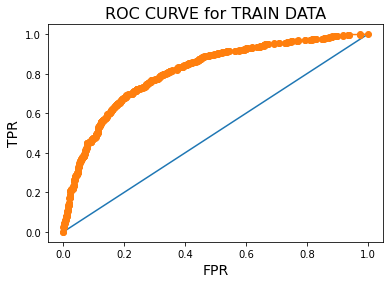

In [121]:
fpr,tpr,thresholds = roc_curve(train_labels, y_train_pred_prob_mlp[:,1])
plt.plot([0,1],[0,1]);
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC CURVE for TRAIN DATA', fontsize = 16)
plt.xlabel('FPR', fontsize = 14)
plt.ylabel('TPR', fontsize = 14)
print('AUC Score train Data: ', roc_auc_score(train_labels, y_train_pred_prob_mlp[:,1]))

AUC Score train Data:  0.8157617290458619


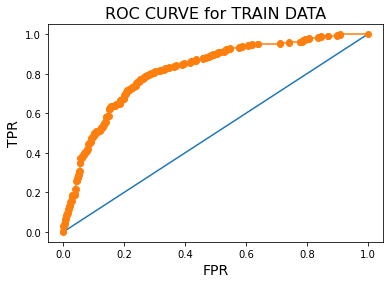

In [122]:
fpr,tpr,thresholds = roc_curve(test_labels, y_test_pred_prob_mlp[:,1])
plt.plot([0,1],[0,1]);
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC CURVE for TRAIN DATA', fontsize = 16)
plt.xlabel('FPR', fontsize = 14)
plt.ylabel('TPR', fontsize = 14)
print('AUC Score train Data: ', roc_auc_score(test_labels, y_test_pred_prob_mlp[:,1]))

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

In [123]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,roc_auc_score

### CART

#### CART TRAIN

In [124]:
cart_train_acc = accuracy_score(train_labels, y_train_pred_dt)
cart_train_prec = precision_score(train_labels, y_train_pred_dt)
cart_train_recall = recall_score(train_labels, y_train_pred_dt)
cart_train_f1 = f1_score(train_labels, y_train_pred_dt)
cart_train_auc = roc_auc_score(train_labels,y_train_pred_prob_dt[:,1])

#### CART TEST

In [125]:
cart_test_acc = accuracy_score(test_labels, y_test_pred_dt)
cart_test_prec = precision_score(test_labels, y_test_pred_dt)
cart_test_recall = recall_score(test_labels, y_test_pred_dt)
cart_test_f1 = f1_score(test_labels, y_test_pred_dt)
cart_test_auc = roc_auc_score(test_labels,y_test_pred_prob_dt[:,1])

### Random Forests

#### Rfcl train

In [126]:
rfcl_train_acc = accuracy_score(train_labels, y_train_pred_rfcl)
rfcl_train_prec = precision_score(train_labels, y_train_pred_rfcl)
rfcl_train_recall = recall_score(train_labels, y_train_pred_rfcl)
rfcl_train_f1 = f1_score(train_labels, y_train_pred_rfcl)
rfcl_train_auc = roc_auc_score(train_labels,y_train_pred_prob_rfcl[:,1])

#### Rfcl test

In [127]:
rfcl_test_acc = accuracy_score(test_labels, y_test_pred_rfcl)
rfcl_test_prec = precision_score(test_labels, y_test_pred_rfcl)
rfcl_test_recall = recall_score(test_labels, y_test_pred_rfcl)
rfcl_test_f1 = f1_score(test_labels, y_test_pred_rfcl)
rfcl_test_auc = roc_auc_score(test_labels,y_test_pred_prob_rfcl[:,1])

### ANN

#### MLP train

In [128]:
mlp_train_acc = accuracy_score(train_labels, y_train_pred_mlp)
mlp_train_prec = precision_score(train_labels, y_train_pred_mlp)
mlp_train_recall = recall_score(train_labels, y_train_pred_mlp)
mlp_train_f1 = f1_score(train_labels, y_train_pred_mlp)
mlp_train_auc = roc_auc_score(train_labels,y_train_pred_prob_mlp[:,1])

#### MLP test

In [129]:
mlp_test_acc = accuracy_score(test_labels, y_test_pred_mlp)
mlp_test_prec = precision_score(test_labels, y_test_pred_mlp)
mlp_test_recall = recall_score(test_labels, y_test_pred_mlp)
mlp_test_f1 = f1_score(test_labels, y_test_pred_mlp)
mlp_test_auc = roc_auc_score(test_labels,y_test_pred_prob_mlp[:,1])

### Creating a dataframe for train and test values

In [130]:
index = ['ACCURACY','PRECISION','RECALL','F1 SCORE','AUC']
df_summary = pd.DataFrame({'CART TRAIN':[cart_train_acc,cart_train_prec,cart_train_recall,cart_train_f1, cart_train_auc],
                           'CART TEST':[cart_test_acc,cart_test_prec,cart_test_recall, cart_test_f1, cart_test_auc],
                           'Random Forest TRAIN':[rfcl_train_acc, rfcl_train_prec, rfcl_train_recall, rfcl_train_f1, rfcl_train_auc],
                           'Random Forest TEST':[rfcl_test_acc, rfcl_test_prec, rfcl_test_recall, rfcl_test_f1,rfcl_test_auc],
                           'ANN TRAIN':[mlp_train_acc, mlp_train_prec, mlp_train_recall, mlp_train_f1, mlp_train_auc],
                           'ANN TEST':[mlp_test_acc,mlp_test_prec, mlp_test_recall,mlp_test_f1, mlp_test_auc]},
                         index = index)

In [131]:
round(df_summary,2)

,CART TRAIN,CART TEST,Random Forest TRAIN,Random Forest TEST,ANN TRAIN,ANN TEST
ACCURACY,0.77,0.78,0.78,0.78,0.77,0.77
PRECISION,0.68,0.69,0.70,0.70,0.68,0.68
RECALL,0.56,0.56,0.54,0.52,0.52,0.51
F1 SCORE,0.61,0.62,0.61,0.59,0.59,0.58
AUC,0.82,0.79,0.83,0.82,0.81,0.82


In [132]:
df_summary[['CART TRAIN','CART TEST']]

,CART TRAIN,CART TEST
ACCURACY,0.772228,0.781141
PRECISION,0.676083,0.686099
RECALL,0.558320,0.564576
F1 SCORE,0.611584,0.619433
AUC,0.815399,0.791409


In [133]:
df_summary[['Random Forest TRAIN','Random Forest TEST']]

,Random Forest TRAIN,Random Forest TEST
ACCURACY,0.777722,0.776484
PRECISION,0.700405,0.696517
RECALL,0.538103,0.516605
F1 SCORE,0.608619,0.593220
AUC,0.828168,0.818529


In [134]:
df_summary[['ANN TRAIN','ANN TEST']]

,ANN TRAIN,ANN TEST
ACCURACY,0.768731,0.770664
PRECISION,0.682927,0.683168
RECALL,0.522551,0.509225
F1 SCORE,0.592070,0.583510
AUC,0.809454,0.815762


In [143]:
cart_train_fpr,cart_train_tpr,t= roc_curve(train_labels, y_train_pred_prob_dt[:,1])
cart_test_fpr, cart_test_tpr,t = roc_curve(test_labels,y_test_pred_prob_dt[:,1])

In [144]:
rfcl_train_fpr, rfcl_train_tpr,t = roc_curve(train_labels, y_train_pred_prob_rfcl[:,1])
rfcl_test_fpr, rfcl_test_tpr,t = roc_curve(test_labels, y_test_pred_prob_rfcl[:,1])

In [157]:
ann_train_fpr, ann_train_tpr,t = roc_curve(train_labels, y_train_pred_prob_mlp[:,1])
ann_test_fpr, ann_test_tpr, t = roc_curve(test_labels, y_test_pred_prob_mlp[:,1])

#### AUC Curve for Training data

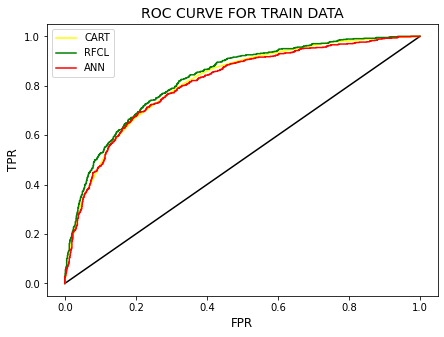

In [153]:
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1], linestyle = '-',color = 'black')
plt.plot(cart_train_fpr, cart_train_tpr, color = 'yellow',label='CART')
plt.plot(rfcl_train_fpr, rfcl_train_tpr, color = 'green', label = 'RFCL')
plt.plot(ann_train_fpr, ann_train_tpr, color = 'red',label = 'ANN')
plt.legend()
plt.xlabel('FPR',fontsize = 12)
plt.ylabel('TPR',fontsize = 12)
plt.title('ROC CURVE FOR TRAIN DATA',fontsize = 14)
plt.show()

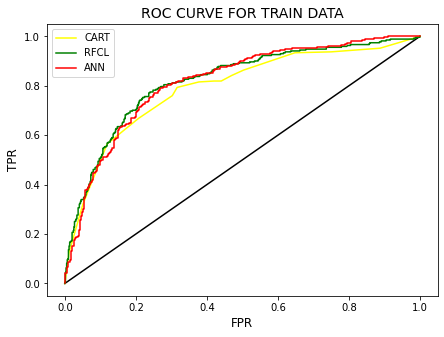

In [158]:
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1], linestyle = '-',color = 'black')
plt.plot(cart_test_fpr, cart_test_tpr, color = 'yellow',label='CART')
plt.plot(rfcl_test_fpr, rfcl_test_tpr, color = 'green', label = 'RFCL')
plt.plot(ann_test_fpr, ann_test_tpr, color = 'red',label = 'ANN')
plt.legend()
plt.xlabel('FPR',fontsize = 12)
plt.ylabel('TPR',fontsize = 12)
plt.title('ROC CURVE FOR TRAIN DATA',fontsize = 14)
plt.show()

# 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

In [42]:
df.groupby('Claimed').mean()

,Age,Commision,Duration,Sales
Claimed,,,,
No,38.461222,10.075978,53.421674,45.393035
Yes,37.656455,25.742670,111.951860,96.618217


In [49]:
pd.crosstab(df.Claimed, df.Agency_Code)

Agency_Code,C2B,CWT,EPX,JZI
Claimed,,,,
No,361,331,1046,209
Yes,552,140,192,30


In [50]:
pd.crosstab(df.Claimed, df.Type)

Type,Airlines,Travel Agency
Claimed,,
No,570,1377
Yes,582,332


In [58]:
pd.crosstab(df.Claimed, df.Channel)

Channel,Offline,Online
Claimed,,
No,29,1918
Yes,17,897


In [55]:
pd.crosstab(df.Claimed, df['Product Name'],margins = True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Claimed,,,,,,
No,396,573,818,39,121,1947
Yes,249,42,253,70,300,914
All,645,615,1071,109,421,2861


In [54]:
pd.crosstab(df.Claimed, df.Destination,margins = True)

Destination,ASIA,Americas,EUROPE,All
Claimed,,,,
No,1563,231,153,1947
Yes,764,88,62,914
All,2327,319,215,2861
